# Gym.OpenAI : Frozen Lake - Introduction to Q-Learning

OpenAI environment : https://gym.openai.com/envs/FrozenLake-v0/

The agent controls the movement of a character in a grid world. Some tiles of the grid are walkable, and others lead to the agent falling into the water. Additionally, the movement direction of the agent is uncertain and only partially depends on the chosen direction. The agent is rewarded for finding a walkable path to a goal tile.

The surface is described using a grid like the following:

    SFFF       (S: starting point, safe)  
    FHFH       (F: frozen surface, safe)  
    FFFH       (H: hole, fall to your doom)  
    HFFG       (G: goal, where the frisbee is located)

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
env=gym.make('FrozenLake-v0')
Q_values = np.zeros([env.observation_space.n,env.action_space.n])

In [3]:
nb_iteration = 3000
learning_rate = 0.8
gamma = 0.95
all_reward = []

In [4]:
for iteration in range(nb_iteration):
    current_state = env.reset()
    j=0
    d = False
    #env.render()
    stacked_reward = 0
    while j<1000:
        j+=1
        action = np.argmax(Q_values[current_state,:]+np.random.randn(1,env.action_space.n)/(1.+iteration))
        next_state,reward,d,info = env.step(action)
        Q_values[current_state,action] = Q_values[current_state,action] + learning_rate*(reward + gamma*max(Q_values[next_state,:]) - Q_values[current_state,action])
        current_state = next_state
        stacked_reward+=reward
        if iteration == nb_iteration-1:
            env.render()
        if d:
            break
    #print(Q_values)
    all_reward.append(stacked_reward)

  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG


Here we printed the last try, which is a success

In [5]:
print(Q_values)

[[9.17058147e-02 5.00456684e-03 5.86720110e-03 6.11155318e-03]
 [4.54651545e-04 1.55204094e-03 1.76876124e-03 2.15403919e-01]
 [1.45739201e-01 2.46807281e-03 8.88891738e-04 2.33092668e-03]
 [3.39632805e-04 9.48009267e-04 1.99660356e-04 2.36049031e-03]
 [1.78326703e-01 1.55240308e-03 1.60057532e-03 9.87274837e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.14020852e-02 1.99349610e-04 1.04064604e-03 1.55498166e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.77507665e-03 5.73939206e-04 7.72541022e-05 1.66394829e-01]
 [1.19663895e-03 6.00865833e-01 0.00000000e+00 0.00000000e+00]
 [9.04508650e-01 1.42634086e-04 1.18560665e-04 6.35841835e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.75284866e-04 7.23227517e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.98800984e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

In [6]:
print ('Total reward over %d iterations:' % nb_iteration)
print(sum(all_reward))

Total reward over 3000 iterations:
1639.0


### Let's plot the evolution of the reward

In [8]:
learning = []
y = []
batch_size = 100
for i in range(0,len(all_reward),batch_size):
    learning.append(sum(all_reward[i:i+batch_size])/batch_size)
    y.append(i)

Text(0.5,1,'Evolution of the reward')

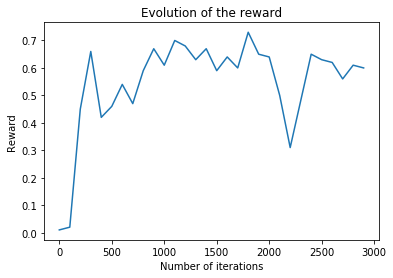

In [9]:
plt.plot(y,learning)
plt.ylabel('Reward')
plt.xlabel('Number of iterations')
plt.title('Evolution of the reward')